In [10]:
from geobr import read_state
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
import utils

DATA_DIR = Path().resolve().parent / 'dados'
TSE_DADOS_DIR = DATA_DIR / 'tse'
ELEICOES_FILE = DATA_DIR / 'eleicoes_resultado_presidente_uf_2018_2022.csv'

sns.set(rc={'figure.figsize':(14, 8)})
sns.set_style("whitegrid")
sns.set_context("talk")

In [11]:
# Na primeira vez, descomente e rode o comando abaixo para gerar o arquivo de entrada
#utils.etl_eleicoes(TSE_DADOS_DIR, ELEICOES_FILE)
eleicoes = pd.read_csv(ELEICOES_FILE)

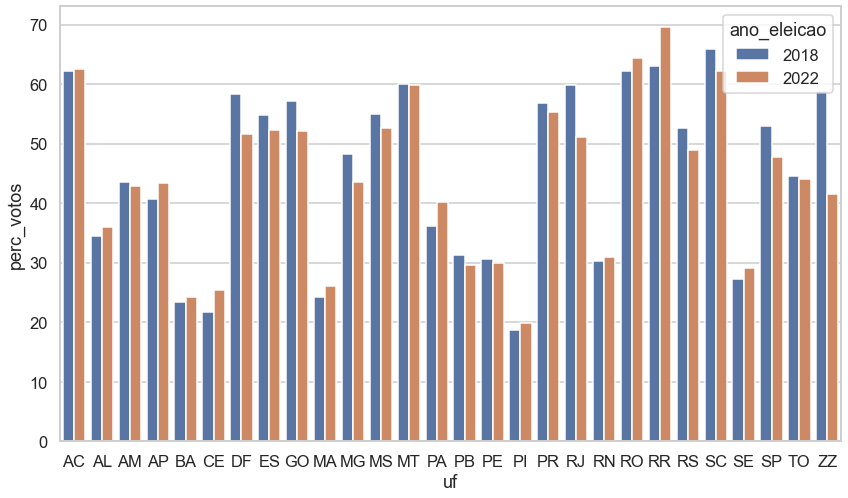

In [12]:
bolsonaro = eleicoes.loc[(eleicoes.nm_urna_candidato == 'JAIR BOLSONARO') & (eleicoes.nr_turno == 1)]
p = sns.barplot(x='uf', y='perc_votos', hue='ano_eleicao', data=bolsonaro)
plt.show()

In [13]:
bolsonaro_pvt = (
    bolsonaro.pivot_table(index='uf', columns='ano_eleicao', values='perc_votos')
    .reset_index()
    .query("uf != 'ZZ'")
)
bolsonaro_pvt['dif'] = bolsonaro_pvt[2022] - bolsonaro_pvt[2018]


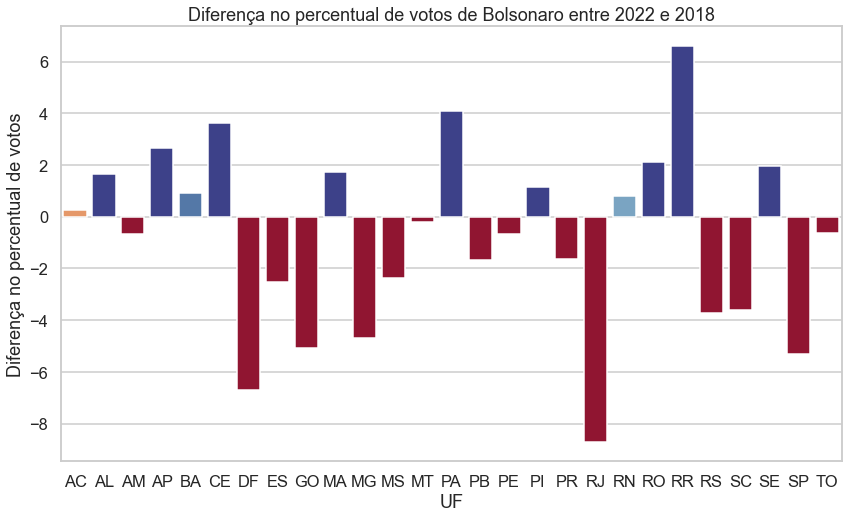

In [14]:
p = sns.barplot(x='uf', y='dif', data=bolsonaro_pvt, palette=cm.RdYlBu(bolsonaro_pvt['dif']))
p.set(xlabel='UF', ylabel='Diferença no percentual de votos',
      title='Diferença no percentual de votos de Bolsonaro entre 2022 e 2018')
plt.show()

<AxesSubplot:xlabel='uf', ylabel='perc_votos'>

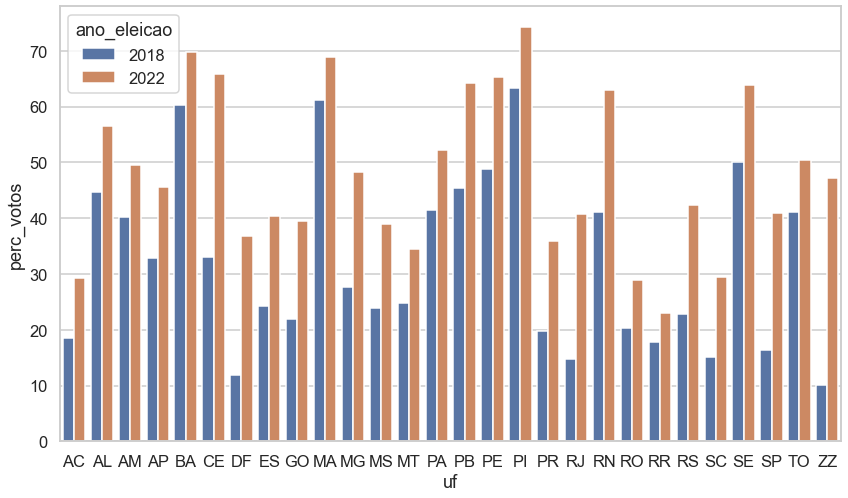

In [15]:
pt = eleicoes.loc[(eleicoes.nr_candidato == 13) & (eleicoes.nr_turno == 1)]
sns.barplot(x='uf', y='perc_votos', hue='ano_eleicao', data=pt)

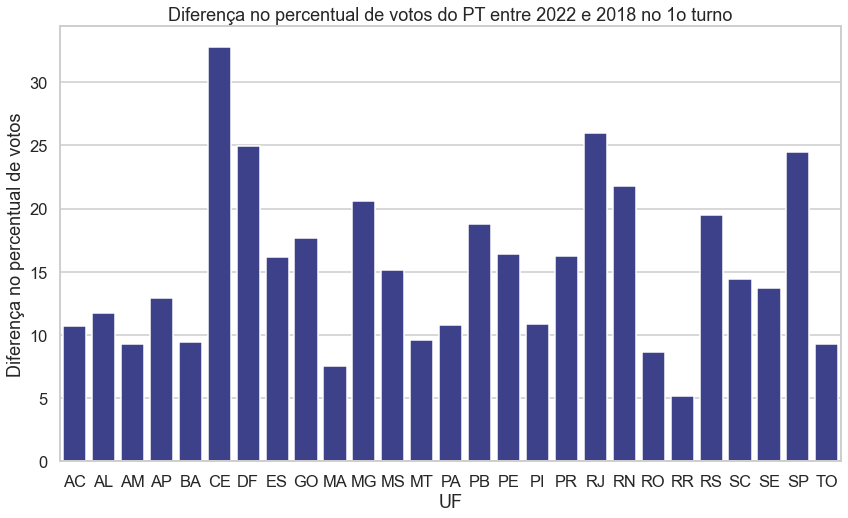

In [16]:
pt_pvt = (
    pt.pivot_table(index='uf', columns='ano_eleicao', values='perc_votos')
    .reset_index()
    .query("uf != 'ZZ'")
)
pt_pvt['dif'] = pt_pvt[2022] - pt_pvt[2018]

p = sns.barplot(x='uf', y='dif', data=pt_pvt, palette=cm.RdYlBu(pt_pvt['dif']))
p.set(xlabel='UF', ylabel='Diferença no percentual de votos',
      title='Diferença no percentual de votos do PT entre 2022 e 2018 no 1o turno')
plt.show()

In [17]:
pt_pvt

ano_eleicao,uf,2018,2022,dif
0,AC,18.533447,29.26,10.726553
1,AL,44.750043,56.50,11.749957
2,AM,40.300045,49.58,9.279955
3,AP,32.772350,45.67,12.897650
4,BA,60.282661,69.73,9.447339
5,CE,33.123784,65.91,32.786216
6,DF,11.873230,36.85,24.976770
7,ES,24.198740,40.40,16.201260
8,GO,21.855471,39.51,17.654529
9,MA,61.261374,68.84,7.578626


In [18]:
bolsonaro_pvt

ano_eleicao,uf,2018,2022,dif
0,AC,62.238429,62.50,0.261571
1,AL,34.403801,36.05,1.646199
2,AM,43.477876,42.80,-0.677876
3,AP,40.740000,43.41,2.670000
4,BA,23.412220,24.31,0.897780
5,CE,21.742650,25.38,3.637350
6,DF,58.366100,51.65,-6.716100
7,ES,54.760857,52.23,-2.530857
8,GO,57.237573,52.16,-5.077573
9,MA,24.281077,26.02,1.738923
